In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
data=pd.read_csv('energydata.csv')

data.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
columns = {'T1': 'Temperature in kitchen area',

'RH_1': 'Humidity in kitchen area',

'T2' : 'Temperature in living room area',

'RH_2': 'Humidity in living room area',

'T3' : 'Temperature in laundry room area',

'RH_3': 'Humidity in laundry room area',

'T4': 'Temperature in office room',

'RH_4' : 'Humidity in office room',

'T5': 'Temperature in bathroom',

'RH_5' : 'Humidity in bathroom',

'T6': 'Temperature outside the building (north side)', 

'RH_6' : 'Humidity outside the building (north side)',

'T7': 'Temperature in ironing room ',

'RH_7': 'Humidity in ironing room',

'T8': 'Temperature in teenager room 2',

'RH_8': 'Humidity in teenager room 2',

'T9': 'Temperature in parents room',

'RH_9': 'Humidity in parents room',

'To': 'Temperature outside (from Chievres weather station)',
'RH_out': 'Humidity outside (from Chievres weather station)'}

In [7]:
data = data.rename(columns=columns)
data.head()

,date,Appliances,lights,Temperature in kitchen area,Humidity in kitchen area,Temperature in living room area,Humidity in living room area,Temperature in laundry room area,Humidity in laundry room area,Temperature in office room,...,Temperature in parents room,Humidity in parents room,T_out,Press_mm_hg,Humidity outside (from Chievres weather station),Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [16]:
graph_data = data[['Temperature in kitchen area','Humidity in kitchen area']].sample(n=20,random_state=5)

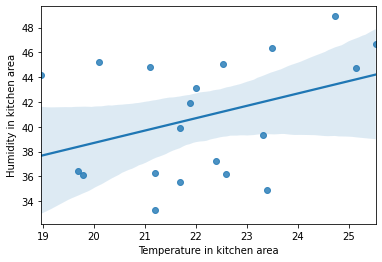

In [12]:
sns.regplot(x = 'Temperature in kitchen area',y = 'Humidity in kitchen area', data = graph_data)

In [17]:
scaler = MinMaxScaler()
data = data.drop(columns= ['date','lights'])

In [22]:
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
features = normalized_data.drop(columns=['Appliances'])
target = normalized_data.Appliances

In [24]:
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
temp_features = normalized_data['Temperature in living room area']
temp_target = normalized_data['Temperature outside the building (north side)']
x_train,x_test,y_train,y_test = train_test_split(temp_features,temp_target,test_size = 0.3, random_state = 42)
model = LinearRegression()
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
lmodel.fit(x_train,y_train)
prediction = lmodel.predict(x_test)
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, prediction)
round(r2_score, 2)

0.64

In [65]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size = 0.3, random_state = 42)


model = LinearRegression( fit_intercept=True)
model.fit(x_train,y_train)
prediction = model.predict(x_test)

In [66]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,prediction)
round(mae,2)

0.05

In [28]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, prediction)
round(r2_score, 2)

0.15

In [32]:
rss = np.sum(np.square(y_test - prediction))
round(rss, 2)

45.35

In [31]:
from sklearn.metrics import  mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, prediction))
round(rmse, 3)

0.088

In [62]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train,y_train)
pred = ridge_reg.predict(x_test)

In [63]:
ridge_rmse = np.sqrt(mean_squared_error(y_test, pred))
round(rmse, 3)

0.088

In [52]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
lasso_pred = lasso_reg.predict(x_test)


In [51]:
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
round(rmse, 3)

0.088